# Ingreso a mi carpeta de Google Drive

In [115]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd  # show current path


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Artificial Intelligence/Reto-Modulo


In [116]:
%cd "/content/gdrive/MyDrive/Artificial Intelligence/Reto-Modulo"
!ls  # show current directory

/content/gdrive/MyDrive/Artificial Intelligence/Reto-Modulo
AI1.ipynb	  tested.csv		Titanic_prueba.ipynb
data_titanic.csv  titanic_prueba.ipynb


# Importancia de Librerias y lectura de Base de datos

In [117]:
import pandas as pd
import numpy as np
import math as mt
from sklearn import metrics
data_titanic = pd.read_csv('data_titanic.csv')
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Selección de variables a estudiar

In [118]:
data_titanic = data_titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin','Pclass','Fare','Embarked'])
data_titanic.head()

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


# Conversión de datos a 0 y 1 en variable "Sexo"

In [119]:
data_titanic['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
data_titanic.head()

,Survived,Sex,Age
0,0,0,22.0
1,1,1,38.0
2,1,1,26.0
3,1,1,35.0
4,0,0,35.0


# Hiper-parametros

In [120]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]
thetaO = [1,1]
print(theta)
# Cargar el valor del learning rate (alpha)
alpha = 0.2
print(alpha)

[1, 1]
0.2


# Funcion de hipotesis y dimension de las listas

In [121]:
# Crear función lambda para la función de hipótesis
h = lambda x, theta: 1 / (1 + mt.exp(-(theta[0] + theta[1] * x)))
# Calcular el total de muestras a partir de los datos (n)
n = len(data_titanic['Age'])
n

891

# Número de Iteraciones

In [122]:
# Definir total de iteraciones a ejecutar
ite = 70

Modelo 1 con la variable "Sexo".                             En cada iteración debemos calcular el valor de la derivada de la función de costo, que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$ (recuerde que los estimados se obtienen con la función de hipótesis de la regresión logística):

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

Además, debemos actualizar los valores de los hiper-parámetros, recordando que $\theta_j=\theta_j-\alpha \frac{∂J_{θ}}{∂θ_j}$:

In [123]:
for i in range(ite):
  deltaT1 = []
  deltaT2 = []
  for xi,yi in zip(data_titanic['Sex'],data_titanic['Survived']):
    pred = h(xi,theta)
    deltaT1.append(pred-yi)
    deltaT2.append(pred*xi-yi*xi)
  dJT0 =(1/n)*sum(deltaT1)
  dJT1 =(1/n)*sum(deltaT2)
  hthe = [dJT0,dJT1]
  # Actualizar theta0
  theta[0] = theta[0] - alpha*(hthe[0])
  # Actualizar theta1
  theta[1] = theta[1] - alpha*(hthe[1])
  print("")

print(dJT0)
print(dJT1)
print("Theta=",theta)







































































0.030609799077447934
-0.04322346880686079
Theta= [-0.8395484590071569, 1.3290233771633844]


# Creación de un lista que nos de la salida de los datos del modelo

In [124]:
pred_Sex = []
for i in data_titanic['Sex']:
    pred_Sex.append(h(i, theta))
# Convertir los valores en enteros
lista_enteros = [round(float(valor)) for valor in pred_Sex]
# Convertir los valores en dt a int o float (según tus necesidades)
dt = data_titanic['Survived'].tolist()  # Convirtiendo a lista
print(dt)
print(lista_enteros)

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

# Barrido de las listas para analizar las predicciones con una tabla de verdad

[[233. 109.]
 [ 81. 468.]]


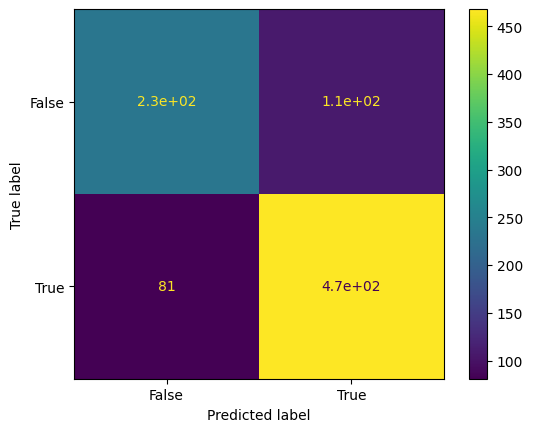

In [125]:
matrix1 = np.zeros((2,2))
vp1 = 0
fn1 = 0
fp1 = 0
vn1 = 0
for z1,w1 in zip(dt,lista_enteros):
  if z1 == w1 and z1 == 1:
    vp1 = vp1 + 1
  elif z1 == w1 and w1 == 0:
    vn1 = vn1 + 1
  elif z1 != w1 and z1 == 1:
    fn1 = fn1 + 1
  elif z1 != w1 and z1 == 0:
    fp1 = fp1 + 1
values1 = [vp1, fn1, fp1, vn1]

for i in range(2):
    for j in range(2):
        matrix1[i][j] = values1.pop(0)
print(matrix1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix1, display_labels = [False, True])
cm_display.plot()


# Metrícas

In [126]:
Accurancy = (vp1+vn1)/(vp1+vn1+fp1+fn1)
precision = vp1 /(vp1+fp1)
recall = vp1 /(vp1+fn1)
Fone = (2*precision*recall)/(precision+recall)
print("Accuracy:",Accurancy)
print("Precision:",precision)
print("Recall:",recall)
print("F1:",Fone)

Accuracy: 0.7867564534231201
Precision: 0.7420382165605095
Recall: 0.6812865497076024
F1: 0.7103658536585367


# RESUMEN

En la esquina superior izquierda de la tabla se obtuvieron 233 instancias que fueron verdaderos negativos (VN). Esto significa que el modelo predijo correctamente 233 instancias que en realidad pertenecían a la clase negativa.
En la esquina superior derecha de la misma se generaron 109 instancias que fueron falsos positivos (FP). Esto significa que el modelo predijo incorrectamente 109 instancias como pertenecientes a la clase positiva cuando en realidad eran de la clase negativa.
En la esquina inferior izquierda de ésta se calcularon 81 instancias que fueron falsos negativos (FN). Esto significa que el modelo predijo incorrectamente 81 instancias como pertenecientes a la clase negativa cuando en realidad eran de la clase positiva.
En la esquina inferior derecha de la matriz se contaron 468 instancias que fueron verdaderos positivos (VP). Esto significa que el modelo predijo correctamente 468 instancias que en realidad pertenecían a la clase positiva.



Accuracy (Exactitud): La exactitud es la proporción de
predicciones correctas sobre el total de predicciones. El modelo tiene una exactitud del 78.68%, lo que significa que aproximadamente el porcentage de las predicciones son correctas.

Precision (Precisión): La precisión se refiere a la proporción de predicciones positivas correctas (verdaderos positivos) en relación con todas las predicciones positivas realizadas por el modelo (verdaderos positivos + falsos positivos). El modelo de regresión logistica  tiene una precisión del 74.20%, lo que significa que aproximadamente el porcentage de las predicciones positivas son realmente positivas.

Recall (Recuperación o Sensibilidad): El recall se refiere a la proporción de instancias positivas que fueron correctamente detectadas por el modelo (verdaderos positivos) en relación con todas las instancias positivas reales (verdaderos positivos + falsos negativos). En el modelo, el recall es del 68.13%, lo que indica que el éste capturó aproximadamente el 68.13% de las instancias positivas reales.

F1 Score: El F1 score es una métrica que combina tanto la precisión como el recall. El valor F1 es la media armónica entre la precisión y el recall. Un F1 score más alto indica un mejor equilibrio entre precisión y recall. En el modelo, el F1 score es del 71.04%.

Modelo 2 con la variable "Age".                             En cada iteración debemos calcular el valor de la derivada de la función de costo, que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$ (recuerde que los estimados se obtienen con la función de hipótesis de la regresión logística):

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

Además, debemos actualizar los valores de los hiper-parámetros, recordando que $\theta_j=\theta_j-\alpha \frac{∂J_{θ}}{∂θ_j}$:

In [127]:
for i in range(ite):
  deltaT_1 = []
  deltaT_2 = []
  for xii,yii in zip(data_titanic['Age'],data_titanic['Survived']):
    pred1 = h(xii,thetaO)
    deltaT_1.append(pred1-yii)
    deltaT_2.append(pred1*xii-yii*xii)
  dJT_0 =(1/n)*sum(deltaT_1)
  dJT_1 =(1/n)*sum(deltaT_2)
  hthe_ = [dJT_0,dJT_1]
  # Actualizar theta0
  thetaO[0] = thetaO[0] - alpha*(hthe_[0])
  # Actualizar theta1
  thetaO[1] = thetaO[1] - alpha*(hthe[1])
  print("")
print(dJT_0)
print(dJT_0)
print("Theta=",theta)







































































nan
nan
Theta= [-0.8395484590071569, 1.3290233771633844]


# Creación de un lista que nos de la salida de los datos del modelo

In [132]:
import math

pred_Age = []
for i in data_titanic['Age']:
    pred_Age.append(h(i, theta))

# Convertir los valores en float y redondear, evitando NaN
lista_enteros1 = []
for valor in pred_Age:
    if not math.isnan(valor):
        lista_enteros1.append(round(float(valor)))

# Convertir los valores en dt a int o float (según tus necesidades)
dt1 = data_titanic['Survived'].tolist()  # Convirtiendo a lista
print(dt1)
print(lista_enteros1)


[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

# Barrido de las listas para analizar las predicciones con una tabla de verdad

[[279.   0.]
 [434.   1.]]


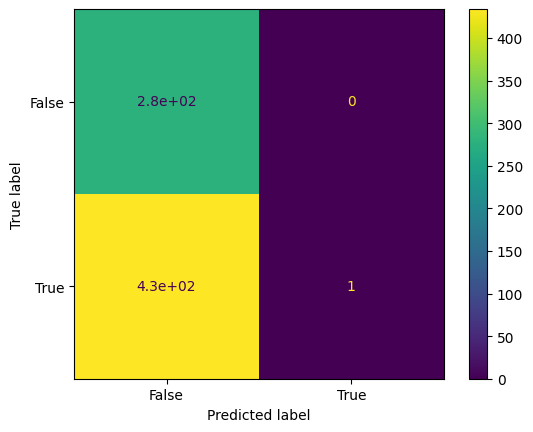

In [133]:
from sklearn import metrics
matrix2 = np.zeros((2,2))
vp2 = 0
fn2 = 0
fp2 = 0
vn2 = 0
for z2,w2 in zip(dt1,lista_enteros1):
  if z2 == w2 and z2 == 1:
    vp2 = vp2 + 1
  elif z2 == w2 and w2 == 0:
    vn2 = vn2 + 1
  elif z2 != w2 and z2 == 1:
    fn2 = fn2 + 1
  elif z2 != w2 and z2 == 0:
    fp2 = fp2 + 1
values1 = [vp2, fn2, fp2, vn2]

for i in range(2):
    for j in range(2):
        matrix2[i][j] = values1.pop(0)
print(matrix2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix2, display_labels = [False, True])
cm_display.plot()

# Metrícas

In [134]:
Accurancy2 = (vp2+vn2)/(vp2+vn2+fp2+fn2)
precision2 = vp2 /(vp2+fp2)
recall2 = vp2 /(vp2+fn2)
Fone2 = (2*precision2*recall2)/(precision2+recall2)
print("Accuracy:",Accurancy2)
print("Precision:",precision2)
print("Recall:",recall2)
print("F1:",Fone2)

Accuracy: 0.39215686274509803
Precision: 0.391304347826087
Recall: 1.0
F1: 0.5625


# Resumen

En la esquina superior izquierda se la tabla su sumaron 279 instancias que fueron clasificadas correctamente como clase negativa (verdaderos negativos, VN).
En la esquina superior derecha de la misma se sumaron 0 instancias que fueron clasificadas incorrectamente como clase positiva cuando en realidad son de clase negativa (falsos positivos, FP).
En la esquina inferior izquierda se obtuvieron 434 instancias que fueron clasificadas incorrectamente como clase negativa cuando en realidad son de clase positiva (falsos negativos, FN).
Finalmente, En la esquina inferior derecha se adjunto 1 instancia que fue clasificada correctamente como clase positiva (verdadero positivo, VP).

Accuracy (Exactitud): La exactitud es la proporción de predicciones correctas sobre el total de predicciones. En el modelo tiene una exactitud del 39.22%, lo que significa que aproximadamente el 39.22% de las predicciones son correctas pero este dato suele ser dubitativo ya que las clases no estan equilibradas.

Precision (Precisión): La precisión se refiere a la proporción de predicciones positivas correctas (verdaderos positivos) en relación con todas las predicciones positivas realizadas por el modelo (verdaderos positivos + falsos positivos). El modelo tiene una precisión del 39.13%, lo que significa que aproximadamente el 39.13% de las predicciones positivas son realmente positivas.

Recall (Recuperación o Sensibilidad): El recall se refiere a la proporción de instancias positivas que fueron correctamente detectadas por el modelo (verdaderos positivos) en relación con todas las instancias positivas reales (verdaderos positivos + falsos negativos). En el modelo, éste valor es del 100%, lo que indica que éste modelo capturó todas las instancias positivas reales.

F1 Score: El F1 score es una métrica que combina tanto la precisión como el recall. Es especialmente útil cuando las clases están desequilibradas. El valor F1 es la media armónica entre la precisión y el recall. Un F1 score más alto indica un mejor equilibrio entre precisión y recall. En tu caso, el F1 score es del 56.25% como lo pudimos notar al principio donde Accuracy sale bajo ya que las clases estan desequilibradas.